<a href="https://colab.research.google.com/github/kirty-saraf/Email_spam/blob/main/Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd

In [83]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [84]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
data.shape

(5572, 5)

## Data Cleaning And EDA

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [90]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
# Rename Columns

data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [92]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
# Assingning ham and spam as 1 and 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target']= encoder.fit_transform(data['target'])

In [94]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
data.isnull().sum()

,0
target,0
text,0


In [96]:
data.duplicated().sum()

403

In [97]:
data.drop_duplicates(keep ='first' ,inplace=True)

In [37]:
data.shape

(5169, 2)

In [98]:
data['target'].value_counts()

,count
target,
0,4516
1,653


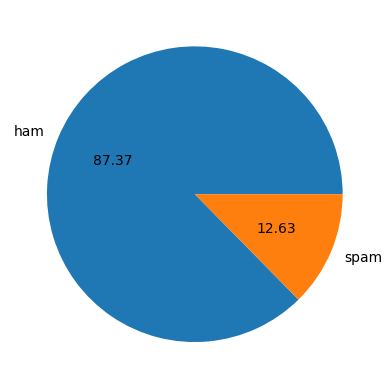

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

So we have nearly 87% not spam and 13% spam so data is imbalanced


In [100]:
import nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [101]:
# No. of char
data['no. of char']=data['text'].apply(lambda x: len(x))

In [102]:
# No .of words
data['no. of words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [103]:
data['no. of sent']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [104]:
data.head()

,target,text,no. of char,no. of words,no. of sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


 difference in No. of char words and sentences use in ham  and spam sentences

In [105]:
data[data['target']==0][['no. of char','no. of words', 'no. of sent']].describe()

,no. of char,no. of words,no. of sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
data[data['target']==1][['no. of char','no. of words', 'no. of sent']].describe()

,no. of char,no. of words,no. of sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no. of char', ylabel='Count'>

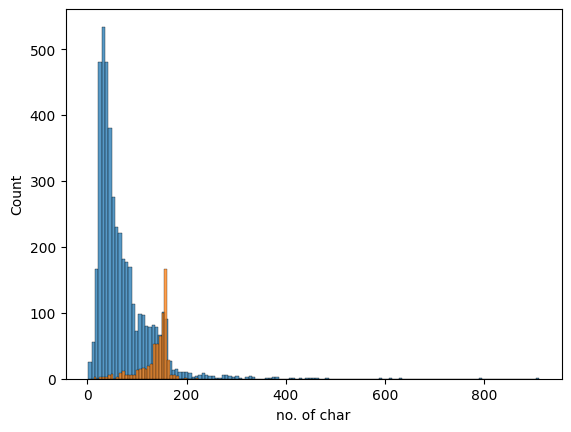

In [107]:
sns.histplot(data[data['target']==0]['no. of char'])
sns.histplot(data[data['target']==1]['no. of char'])

So we can  say that the no. of char in spam msg is more than no. of char in ham msg

<Axes: xlabel='no. of words', ylabel='Count'>

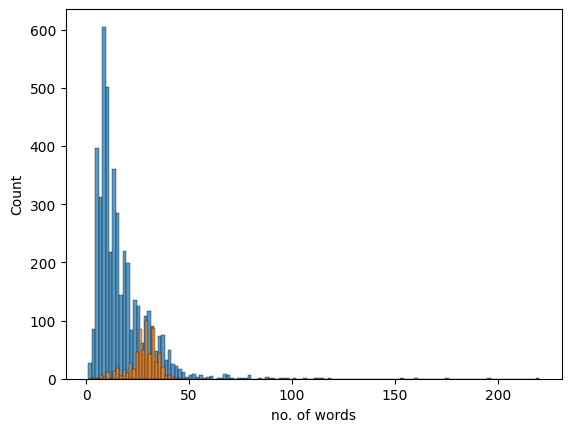

In [108]:
sns.histplot(data[data['target']==0]['no. of words'])
sns.histplot(data[data['target']==1]['no. of words'])

<Axes: >

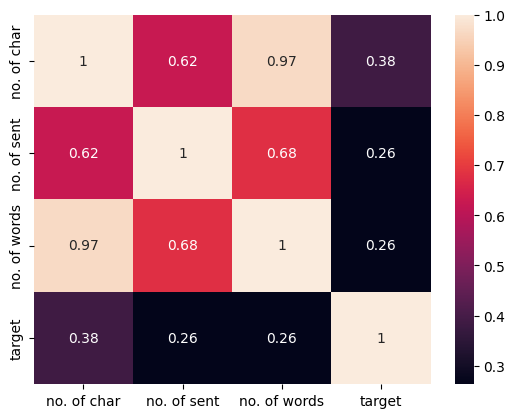

In [109]:
sns.heatmap(data[['no. of char','no. of sent','no. of words','target']].corr(),annot=True)

Varation between No. of char and traget  is high compare to other two

## Text Preprocessing


In [113]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def text_preprocess(text):
  text=text.lower()  #Lower Case
  text=nltk.word_tokenize(text)  #Tokenization
  y=[]
  for i in text:           # Removing special char
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:            # Removing stopwords and punctuation
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:           # Stemming
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [115]:
data['new_text']=data['text'].apply(text_preprocess)

In [116]:
data.head()

,target,text,no. of char,no. of words,no. of sent,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [122]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [126]:
spam_wc=wc.generate(data[data['target']==1]['new_text'].str.cat(sep=" "))

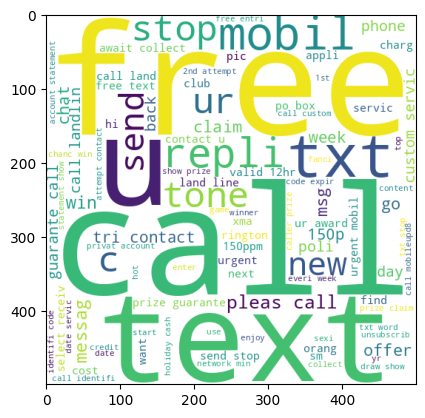

In [128]:
plt.imshow(spam_wc)

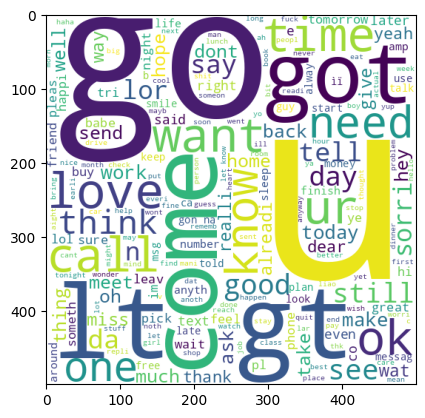

In [132]:
ham_wc=wc.generate(data[data['target']==0]['new_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

## Model Building


In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [138]:
x=tfidf.fit_transform(data['new_text']).toarray()

In [145]:
y=data['target'].values

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [153]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [160]:
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)
print("Acc. Score :", accuracy_score(y_test,ypred1))
print("Precision :", precision_score(y_test,ypred1))

Acc. Score : 0.8694390715667312
Precision : 0.5068493150684932


In [159]:
mnb.fit(x_train,y_train)
ypred1=mnb.predict(x_test)
print("Acc. Score :", accuracy_score(y_test,ypred1))
print("Precision :", precision_score(y_test,ypred1))

Acc. Score : 0.9709864603481625
Precision : 1.0


In [161]:
bnb.fit(x_train,y_train)
ypred1=bnb.predict(x_test)
print("Acc. Score :", accuracy_score(y_test,ypred1))
print("Precision :", precision_score(y_test,ypred1))

Acc. Score : 0.9835589941972921
Precision : 0.991869918699187


So we can either choose Multinomial NB or Bernoulli NB since in this case precision matters more than accuracy(we do not want a ham msg to be called as spam)se we can use Multinomial NB.
